# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 0
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [5]:
images = np.load('images_proj.npy')
labels = pd.read_csv('Labels_proj.csv')

# **Exploratory Data Analysis**

In [6]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


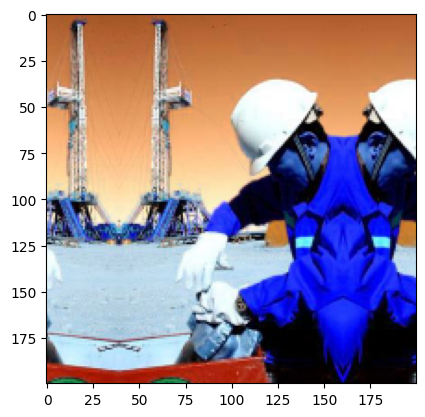

In [ ]:
plt.imshow(images[10]);

###Plot random images from each of the classes and print their corresponding labels.

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

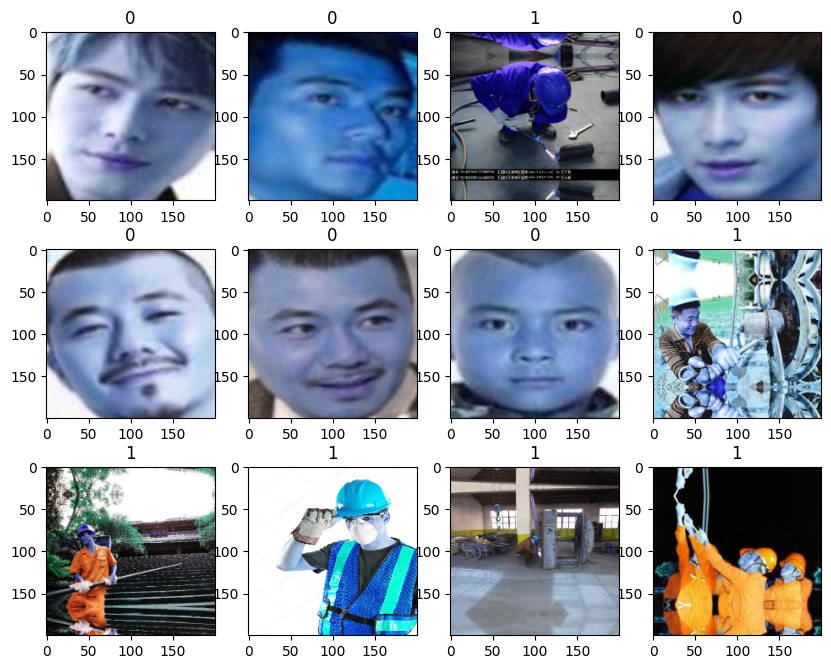

In [ ]:
plot_images(images,labels)

## Checking for class imbalance


In [ ]:
print(labels['Label'].unique())
print(labels['Label'].value_counts())

[1 0]
Label
0    320
1    311
Name: count, dtype: int64


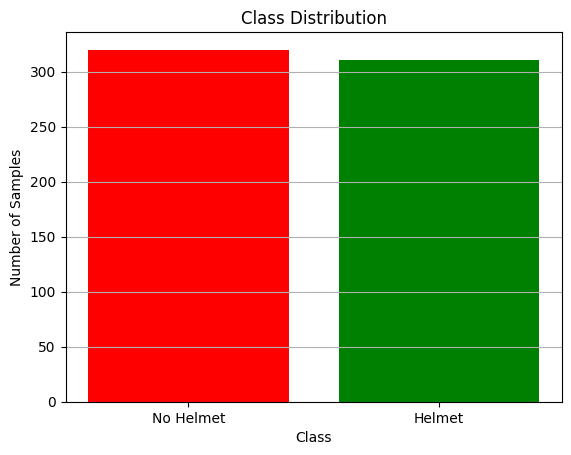

In [ ]:
class_counts = labels['Label'].value_counts().sort_index()


plt.bar(['No Helmet', 'Helmet'], class_counts.values, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.grid(axis='y')
plt.show()

# the chart shows that the Dataset is quite balanced with 320 images on without Helmet and 311 images on Helmet.

# **Data Preprocessing**

## Converting images to grayscale

In [ ]:
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

In [ ]:
gray_images = []
for i in range(len(images)):
  gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

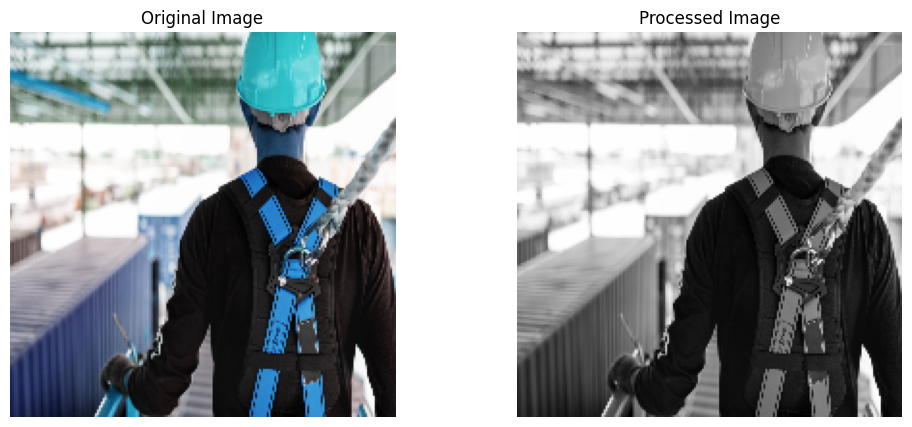

In [ ]:
n = 36
grid_plot(images[n],gray_images[n],gray=True)

### Splitting the dataset



In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [8]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 200, 200, 3) (504, 1)
(63, 200, 200, 3) (63, 1)
(64, 200, 200, 3) (64, 1)


### Data Normalization

In [18]:
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [20]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [ ]:
model_1 = Sequential()


model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(200,200,3)))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2,2), padding='same'))
model_1.add(Conv2D(128, (3,3), activation='relu', padding="same"))

model_1.add(Flatten())
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))



In [ ]:
opt = Adam(learning_rate=1e-4)
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy","Recall"])

In [ ]:
model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │       320,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,257 (1.58 MB)

 Trainable params: 413,257 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1 = model_1.fit(
            X_train_normalized, y_train,
            epochs=20,
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=32,
            verbose=2
)

Epoch 1/20
16/16 - 11s - 669ms/step - Recall: 0.9960 - accuracy: 0.6548 - loss: 0.6516 - val_Recall: 1.0000 - val_accuracy: 0.4921 - val_loss: 0.6116
Epoch 2/20
16/16 - 0s - 29ms/step - Recall: 0.9960 - accuracy: 0.7341 - loss: 0.5576 - val_Recall: 1.0000 - val_accuracy: 0.6190 - val_loss: 0.4979
Epoch 3/20
16/16 - 1s - 38ms/step - Recall: 0.9960 - accuracy: 0.8274 - loss: 0.4599 - val_Recall: 1.0000 - val_accuracy: 0.7937 - val_loss: 0.4116
Epoch 4/20
16/16 - 0s - 30ms/step - Recall: 0.9960 - accuracy: 0.9167 - loss: 0.4004 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.3729
Epoch 5/20
16/16 - 0s - 30ms/step - Recall: 1.0000 - accuracy: 0.9563 - loss: 0.3751 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.3757
Epoch 6/20
16/16 - 0s - 30ms/step - Recall: 1.0000 - accuracy: 0.9742 - loss: 0.3666 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.3649
Epoch 7/20
16/16 - 1s - 38ms/step - Recall: 0.9960 - accuracy: 0.9841 - loss: 0.3651 - val_Recall: 1.0000 - va

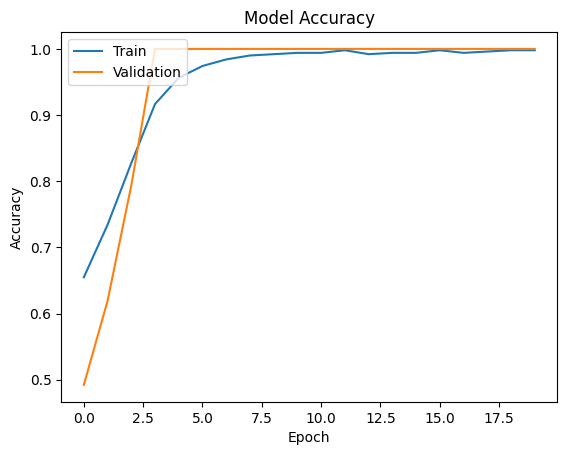

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train)

print("Train performance metrics")
print(model_1_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.994048  0.994048   0.994119  0.994048


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


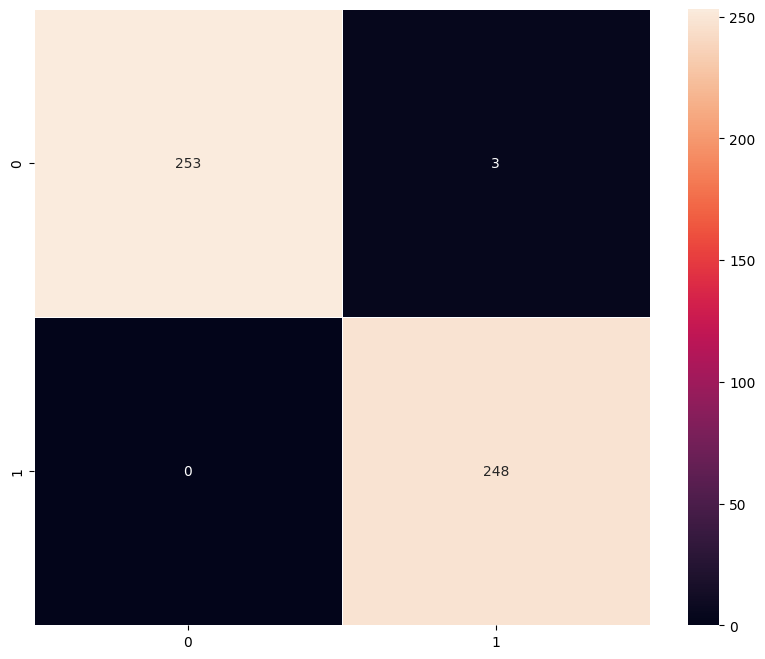

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized,y_train)

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


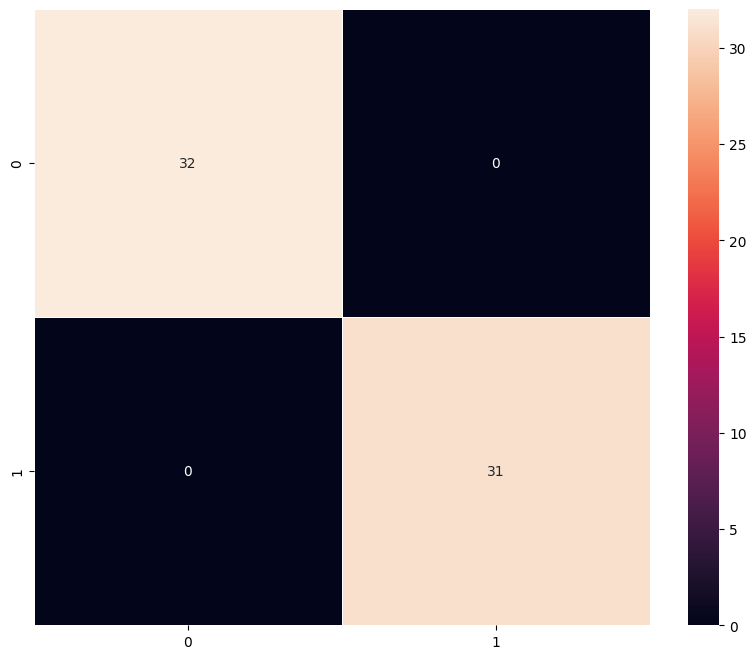

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val)

### Vizualizing the predictions

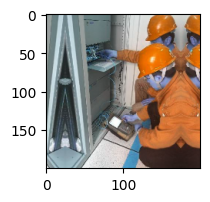

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


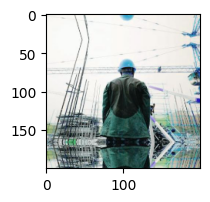

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: 1
True Label: Label    1
Name: 62, dtype: int64


In [ ]:
i= 10
plt.figure(figsize=(2,2))
plt.imshow(X_val[i])
plt.show()
prediction = model_1.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[i]
print('True Label:', true_label)

j= 12
plt.figure(figsize=(2,2))
plt.imshow(X_val[j])
plt.show()
prediction = model_1.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[j]
print('True Label:', true_label)

## Model 2: (VGG-16 (Base))

In [21]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
for layer in vgg_model.layers:
    layer.trainable = False

In [23]:
model_2 = Sequential()
model_2.add(vgg_model)
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

In [24]:
from tensorflow.keras.losses import BinaryCrossentropy
opt=Adam(learning_rate=1e-4 )

model_2.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])



In [25]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
train_datagen = ImageDataGenerator()

In [27]:

epochs = 20

batch_size = 128

history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 219s 81s/step - accuracy: 0.5904 - loss: 0.6857 - val_accuracy: 0.8254 - val_loss: 0.5875
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 20s/step - accuracy: 0.8281 - loss: 0.5963 - val_accuracy: 0.8730 - val_loss: 0.5615
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 220s 78s/step - accuracy: 0.8689 - loss: 0.5473 - val_accuracy: 0.9365 - val_loss: 0.4937
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 20s/step - accuracy: 0.9297 - loss: 0.5027 - val_accuracy: 0.9524 - val_loss: 0.4711
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 222s 80s/step - accuracy: 0.9808 - loss: 0.4527 - val_accuracy: 0.9683 - val_loss: 0.4037
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 88s 15s/step - accuracy: 0.9922 - loss: 0.4006 - val_accuracy: 0.9841 - val_loss: 0.3835
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 233s 78s/step - accuracy: 0.9891 - loss: 0.3701 - val_accuracy: 1.0000 - val_loss: 0.3305
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 20s/step - accuracy: 1.0000 - loss: 0.3173 - val_accuracy: 1.0000 - val_loss: 

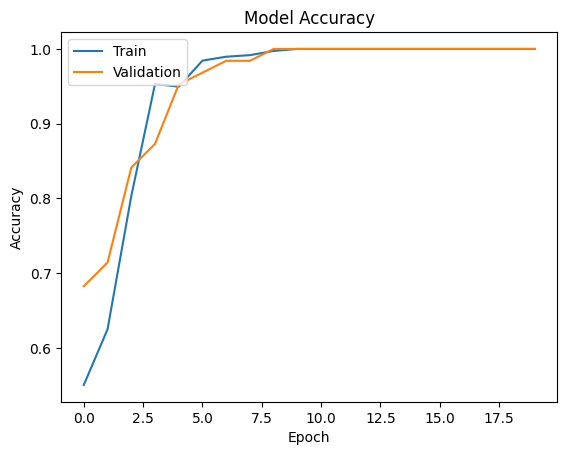

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train)

print("Train performance metrics")
print(model_2_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


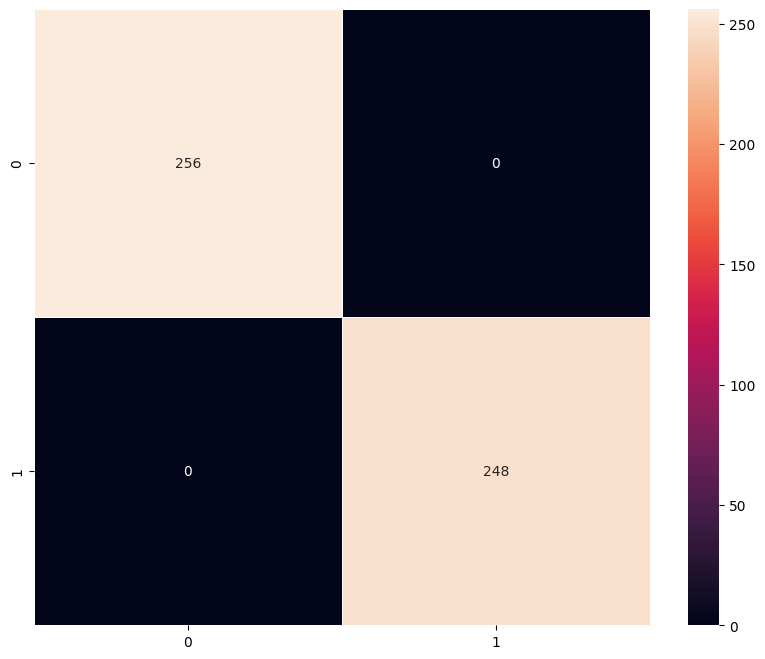

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


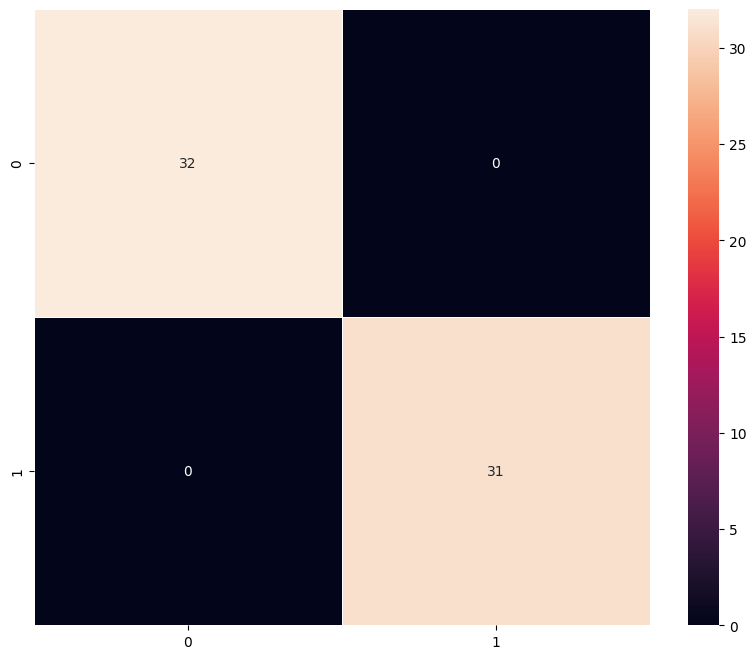

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val)

### Visualizing the prediction:

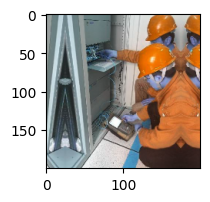

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


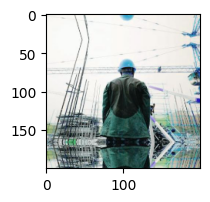

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Label: 1
True Label: Label    1
Name: 62, dtype: int64


In [ ]:
i= 10
plt.figure(figsize=(2,2))
plt.imshow(X_val[i])
plt.show()
prediction = model_2.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[i]
print('True Label:', true_label)

j= 12
plt.figure(figsize=(2,2))
plt.imshow(X_val[j])
plt.show()
prediction = model_2.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[j]
print('True Label:', true_label)

## Model 3: (VGG-16 (Base + FFNN))

In [ ]:
model_3 = Sequential()
model_3.add(vgg_model)
model_3.add(Flatten())
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam()
model_3.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6535 - loss: 0.5691 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9688 - loss: 0.0502 - val_accuracy: 0.9683 - val_loss: 0.0493
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.9714 - loss: 0.1051 - val_accuracy: 1.0000 - val_loss: 9.7676e-07
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 4.1896e-05 - val_accuracy: 1.0000 - val_loss: 3.9388e-07
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 1.0000 - loss: 1.2067e-04 - val_accuracy: 1.0000 - val_loss: 2.1924e-05
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 8.2065e-04 - val_accuracy: 1.0000 - val_loss: 6.8457e-05
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 0.9944 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 1.3592e-05
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9922 - loss: 0.0190 - val

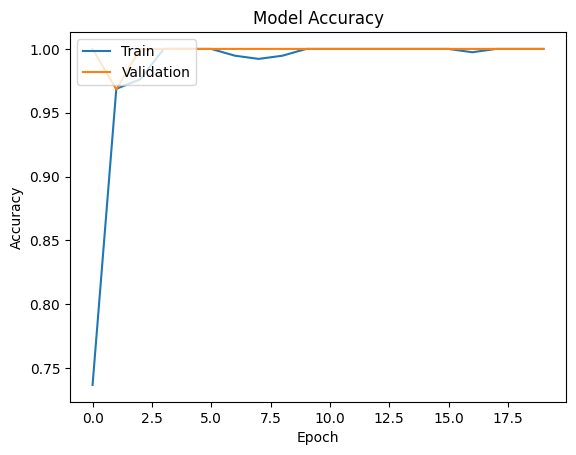

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train)

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step


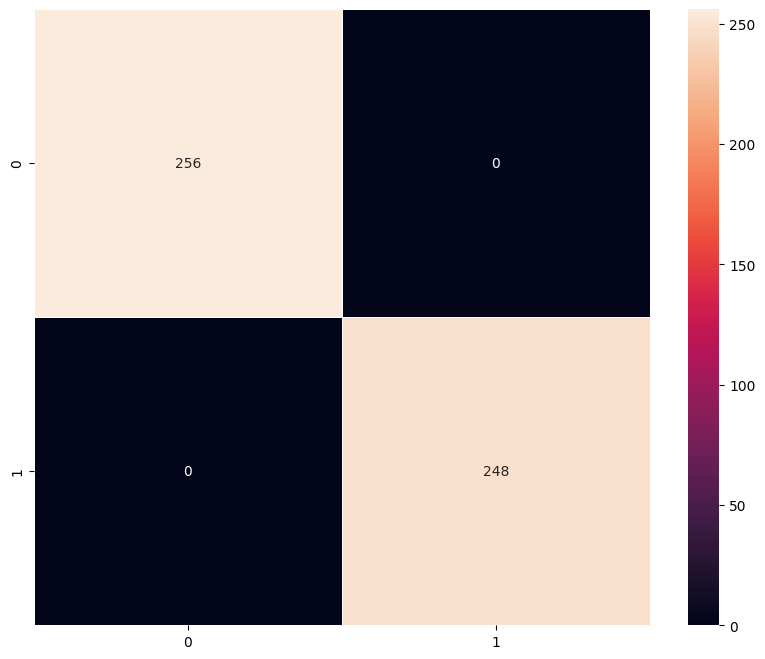

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train)

In [ ]:
model_3_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step


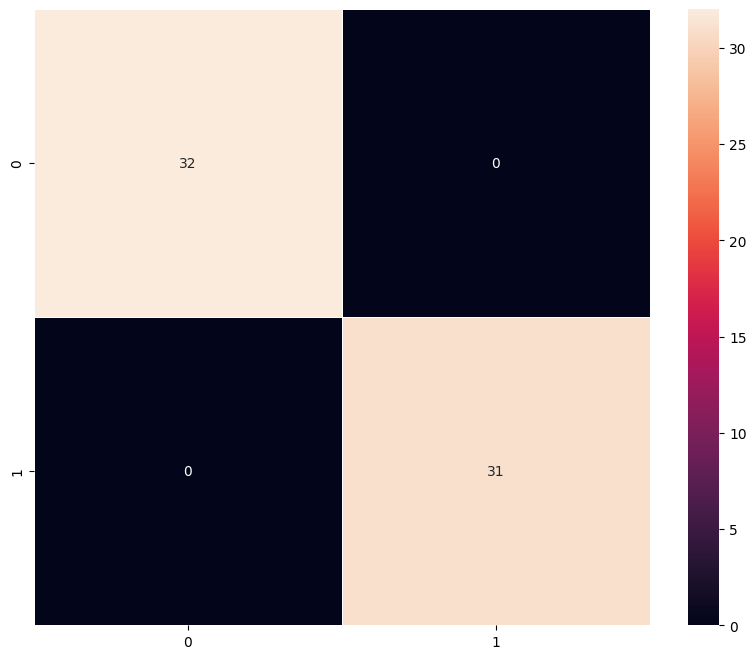

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val)

#### Visualizing the predictions

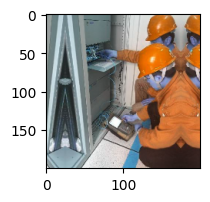

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


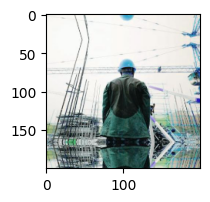

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Label: 1
True Label: Label    1
Name: 62, dtype: int64


In [ ]:
i= 10
plt.figure(figsize=(2,2))
plt.imshow(X_val[i])
plt.show()
prediction = model_3.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[i]
print('True Label:', true_label)

j= 12
plt.figure(figsize=(2,2))
plt.imshow(X_val[j])
plt.show()
prediction = model_3.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[j]
print('True Label:', true_label)

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_4 = Sequential()


model_4.add(vgg_model)

model_4.add(Flatten())

model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(rate=0.4))
model_4.add(Dense(32,activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
opt=Adam()

model_4.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.3,
                              zoom_range=0.4
                              )

In [ ]:
history_vgg16 = model_4.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5022 - loss: 0.8471 - val_accuracy: 0.8095 - val_loss: 0.4416
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6641 - loss: 0.5348 - val_accuracy: 1.0000 - val_loss: 0.2559
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 961ms/step - accuracy: 0.9557 - loss: 0.2431 - val_accuracy: 1.0000 - val_loss: 0.0383
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9750 - loss: 0.1117 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.9807 - loss: 0.0608 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9922 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - accuracy: 0.9918 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9922 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 0.0018

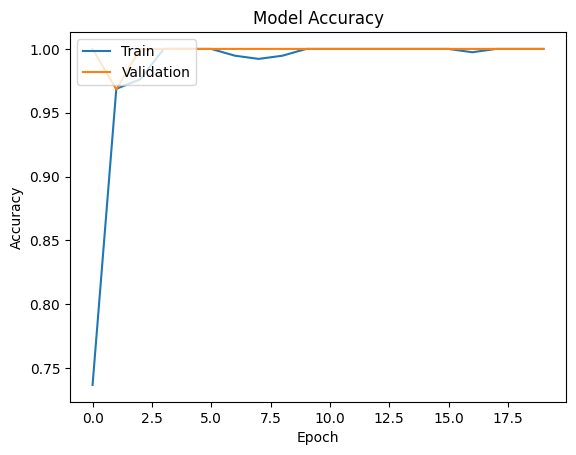

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_normalized,y_train)

print("Train performance metrics")
print(model_4_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step
Train performance metrics
   Accuracy   Recall  Precision  F1 Score
0   0.59127  0.59127   0.669171  0.532673


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step


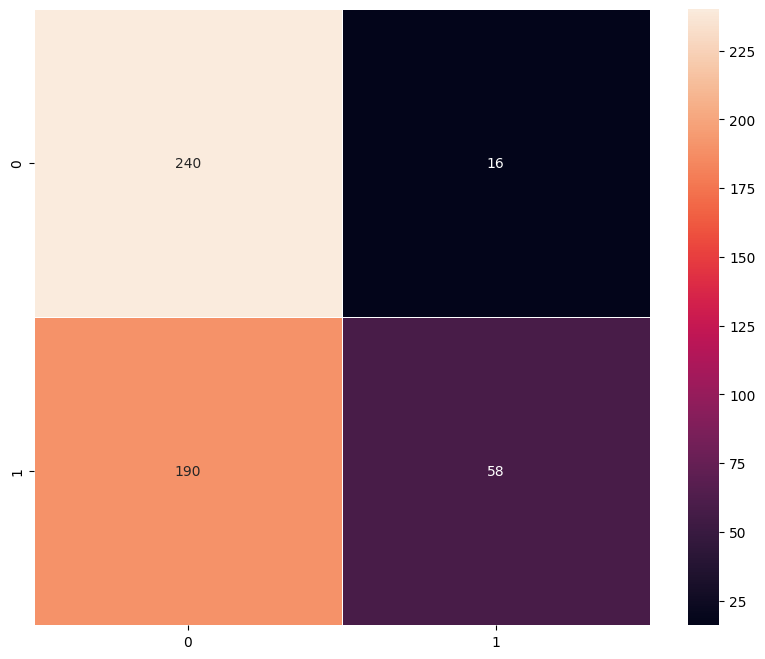

In [ ]:
plot_confusion_matrix(model_4,X_train_normalized,y_train)

In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_4_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.587302  0.587302   0.641137  0.538171


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


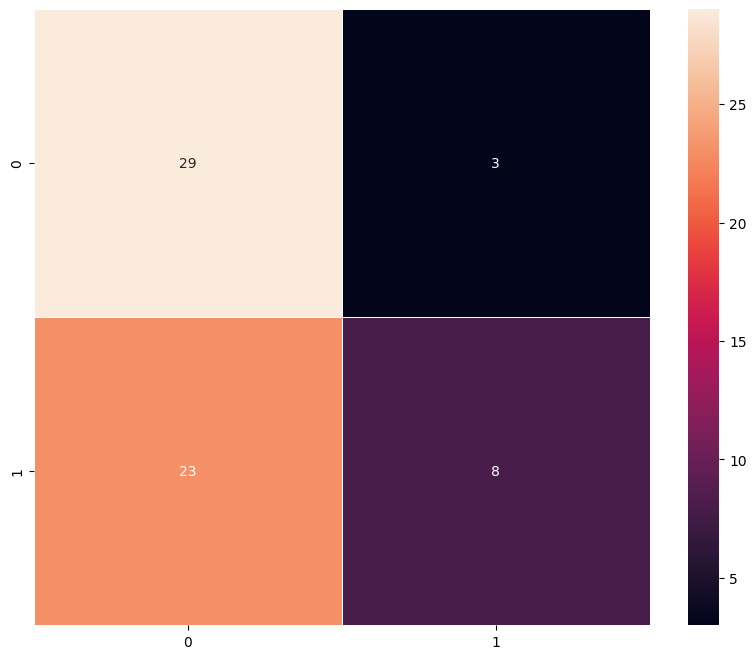

In [ ]:
plot_confusion_matrix(model_4,X_val_normalized,y_val)

#### Visualizing the predictions

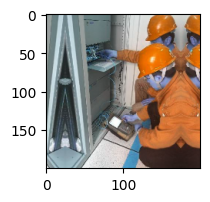

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label: 0
True Label: Label    1
Name: 59, dtype: int64


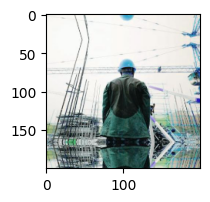

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label: 0
True Label: Label    1
Name: 62, dtype: int64


In [ ]:
i= 10
plt.figure(figsize=(2,2))
plt.imshow(X_val[i])
plt.show()
prediction = model_4.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[i]
print('True Label:', true_label)

j= 12
plt.figure(figsize=(2,2))
plt.imshow(X_val[j])
plt.show()
prediction = model_4.predict(X_val_normalized[i].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[j]
print('True Label:', true_label)

# **Model Performance Comparison and Final Model Selection**

In [ ]:
models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
   "CNN","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_train_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "CNN","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,CNN,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.994048,1.0,1.0,0.591270
Recall,0.994048,1.0,1.0,0.591270
Precision,0.994119,1.0,1.0,0.669171
F1 Score,0.994048,1.0,1.0,0.532673


In [ ]:
models_valid_comp_df

,CNN,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0,0.591270
Recall,1.0,1.0,1.0,0.591270
Precision,1.0,1.0,1.0,0.669171
F1 Score,1.0,1.0,1.0,0.532673


VGG-16 (Base) and VGG-16 (Base + FFNN) are the best performers.
Both achieved perfect performance on the test set

Adding the FFNN did not improve results, so simpler (Base only) is preferred.

## Test Performance

In [32]:
model_2_test_perf = model_performance_classification(model_2,X_test_normalized,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 15s/step


In [33]:
model_2_test_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 15s/step


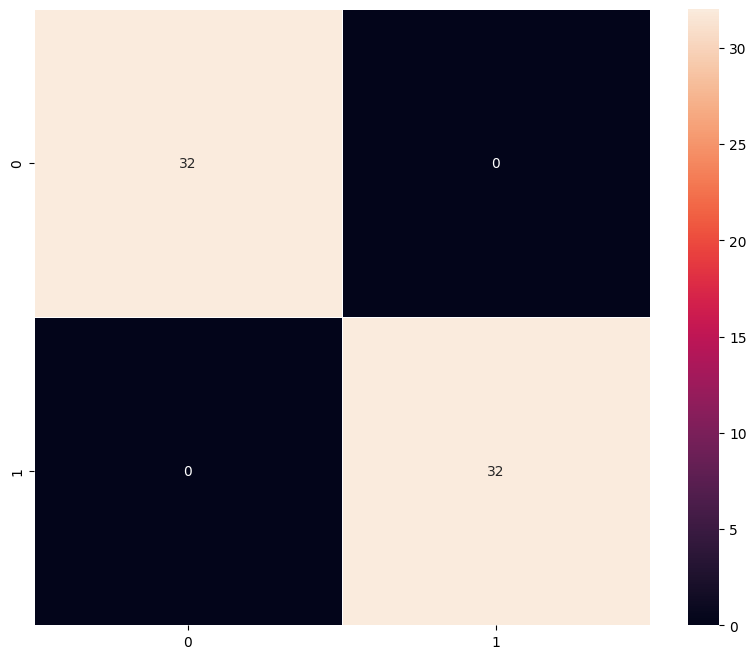

In [34]:
plot_confusion_matrix(model_2, X_test_normalized,y_test)

# **Actionable Insights & Recommendations**

-
-

1-Use VGG-16 Base as final model — it's accurate and simple

2-Adding dense layers (FFNN) or augmentation did not improve performance, and in fact reduced test performance.

3-The model was able to generalize perfectly from training to unseen test data, which means the visual distinction between helmet/no helmet is strong and consistent.

4- augmentation degraded performance, this may be because of Over-aggressive transformations    

<font size=5 color='blue'>Power Ahead!</font>
___